In [ ]:
# import tensorflow as tf
import tqdm
import tensorflow.compat.v1 as tf

tf.compat.v1.disable_eager_execution()
#####!完成作业遇到的问题：tensorflow.examples模块已经弃用
# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

learning_rate = 1e-4
keep_prob_rate = 0.7 # 
max_epoch = 2000
def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs, keep_prob: 1})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys, keep_prob: 1})
    return result

#####!完成作业遇到的问题：tf.truncated_normal 已被移除，进行修改
def weight_variable(shape):
    # initial = tf.truncated_normal(shape, stddev=0.1)
    initial = tf.random.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    # 每一维度  滑动步长全部是 1， padding 方式 选择 same
    # 提示 使用函数  tf.nn.conv2d
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')##!注意要大写

def max_pool_2x2(x):
    # 滑动步长 是 2步; 池化窗口的尺度 高和宽度都是2; padding 方式 请选择 same
    # 提示 使用函数  tf.nn.max_pool
    
    return  tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 784])/255.
ys = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)
x_image = tf.reshape(xs, [-1, 28, 28, 1])

#  卷积层 1
## conv1 layer ##
W_conv1 = weight_variable([7, 7, 1, 32]) # patch 7x7, in size 1, out size 32
b_conv1 = bias_variable([32])                     
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1) # 卷积  自己选择 选择激活函数
h_pool1 = max_pool_2x2(h_conv1)                          # 池化  

# 卷积层 2
W_conv2 = weight_variable([5, 5, 32, 64]) # patch 5x5, in size 32, out size 64
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2) # 卷积  自己选择 选择激活函数
h_pool2 = max_pool_2x2(h_conv2)                          # 池化

#  全连接层 1
## fc1 layer ##
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7 * 7 * 64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# 全连接层 2
## fc2 layer ##
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
prediction = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)


# 交叉熵函数
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),
                                              reduction_indices=[1]))
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    for i in tqdm(range(max_epoch)):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob:keep_prob_rate})
        if i % 100 == 0:
            print("train_accuracy: " + (compute_accuracy(
                mnist.test.images[:1000], mnist.test.labels[:1000])).astype(str))
    print("train_accuracy: " + (compute_accuracy(
        mnist.test.images[:1000], mnist.test.labels[:1000])).astype(str))


In [48]:
import pandas as pd
import tensorflow as tf
print(tf.__version__)

import numpy as np
import matplotlib.pyplot as plt

(train_features,train_labels),(test_features,test_labels)=tf.keras.datasets.mnist.load_data()
train_features = train_features/255
test_features = test_features/255
print("训练集个数与照片尺寸 {}".format(train_features.shape))
print("测试集个数与照片尺寸 {}".format(test_features.shape))


2.16.1
训练集个数与照片尺寸 (60000, 28, 28)
测试集个数与照片尺寸 (10000, 28, 28)


In [45]:
# # ##! 重新修改加载数据集的方式
# import gzip
# import numpy as np

# def load_mnist_images(filename):
#     with gzip.open(filename, 'rb') as f:
#         data = np.frombuffer(f.read(), np.uint8, offset=16)
#     return data.reshape(-1, 28, 28).astype(np.float32) / 255.0

# def load_mnist_labels(filename):
#     with gzip.open(filename, 'rb') as f:
#         data = np.frombuffer(f.read(), np.uint8, offset=8)
#     return data.astype(np.int32)

# train_images_file = 'mnist/MNIST/raw/train-images-idx3-ubyte.gz'
# train_labels_file = 'mnist/MNIST/raw/train-labels-idx1-ubyte.gz'
# test_images_file = 'mnist/MNIST/raw/t10k-images-idx3-ubyte.gz'
# test_labels_file = 'mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz'

# train_images = load_mnist_images(train_images_file)
# train_labels = load_mnist_labels(train_labels_file)
# test_images = load_mnist_images(test_images_file)
# test_labels = load_mnist_labels(test_labels_file)

# train_images = train_images.reshape(-1, 28, 28, 1)
# test_images = test_images.reshape(-1, 28, 28, 1)

# print(train_images.shape)

(60000, 28, 28, 1)


In [46]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Reshape([28,28,1]),
    tf.keras.layers.Conv2D(32, (7, 7), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(10, activation='softmax')


])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_2 (Reshape)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 32)     │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 10, 10, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │     1,639,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,702,538 (6.49 MB)

 Trainable params: 1,702,538 (6.49 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
"""模型编译"""
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['acc']
)
tf.config.run_functions_eagerly(True)

"""模型训练"""
model.fit(train_features, train_labels , epochs = 10, batch_size=1000)



In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist['epoch']=hist['epoch']+1

def plot_history(hist):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.plot(hist['epoch'], hist['loss'],
           label='loss')
    plt.legend()
    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.plot(hist['epoch'], hist['acc'],
           label = 'acc',color = 'red')
#     plt.ylim([0,30])
    plt.legend()
#     plt.show()
plot_history(hist)


In [ ]:
"""模型评价"""
model.evaluate(test_features, test_labels, verbose=2)

##由于tensorflow1.x实现的版本有很多错误，很多包已经无法再使用，故实现了tensorflow2.x适配的版本，但是实现过程中一直报错:`tf.data.Dataset` only supports Python-style iteration in eager mode or within tf.function.尝试使用旧版和新版在jupyter中运行都会有这个错误，后面实现的代码在CNN_tensorflow.py中，最终的结果为:

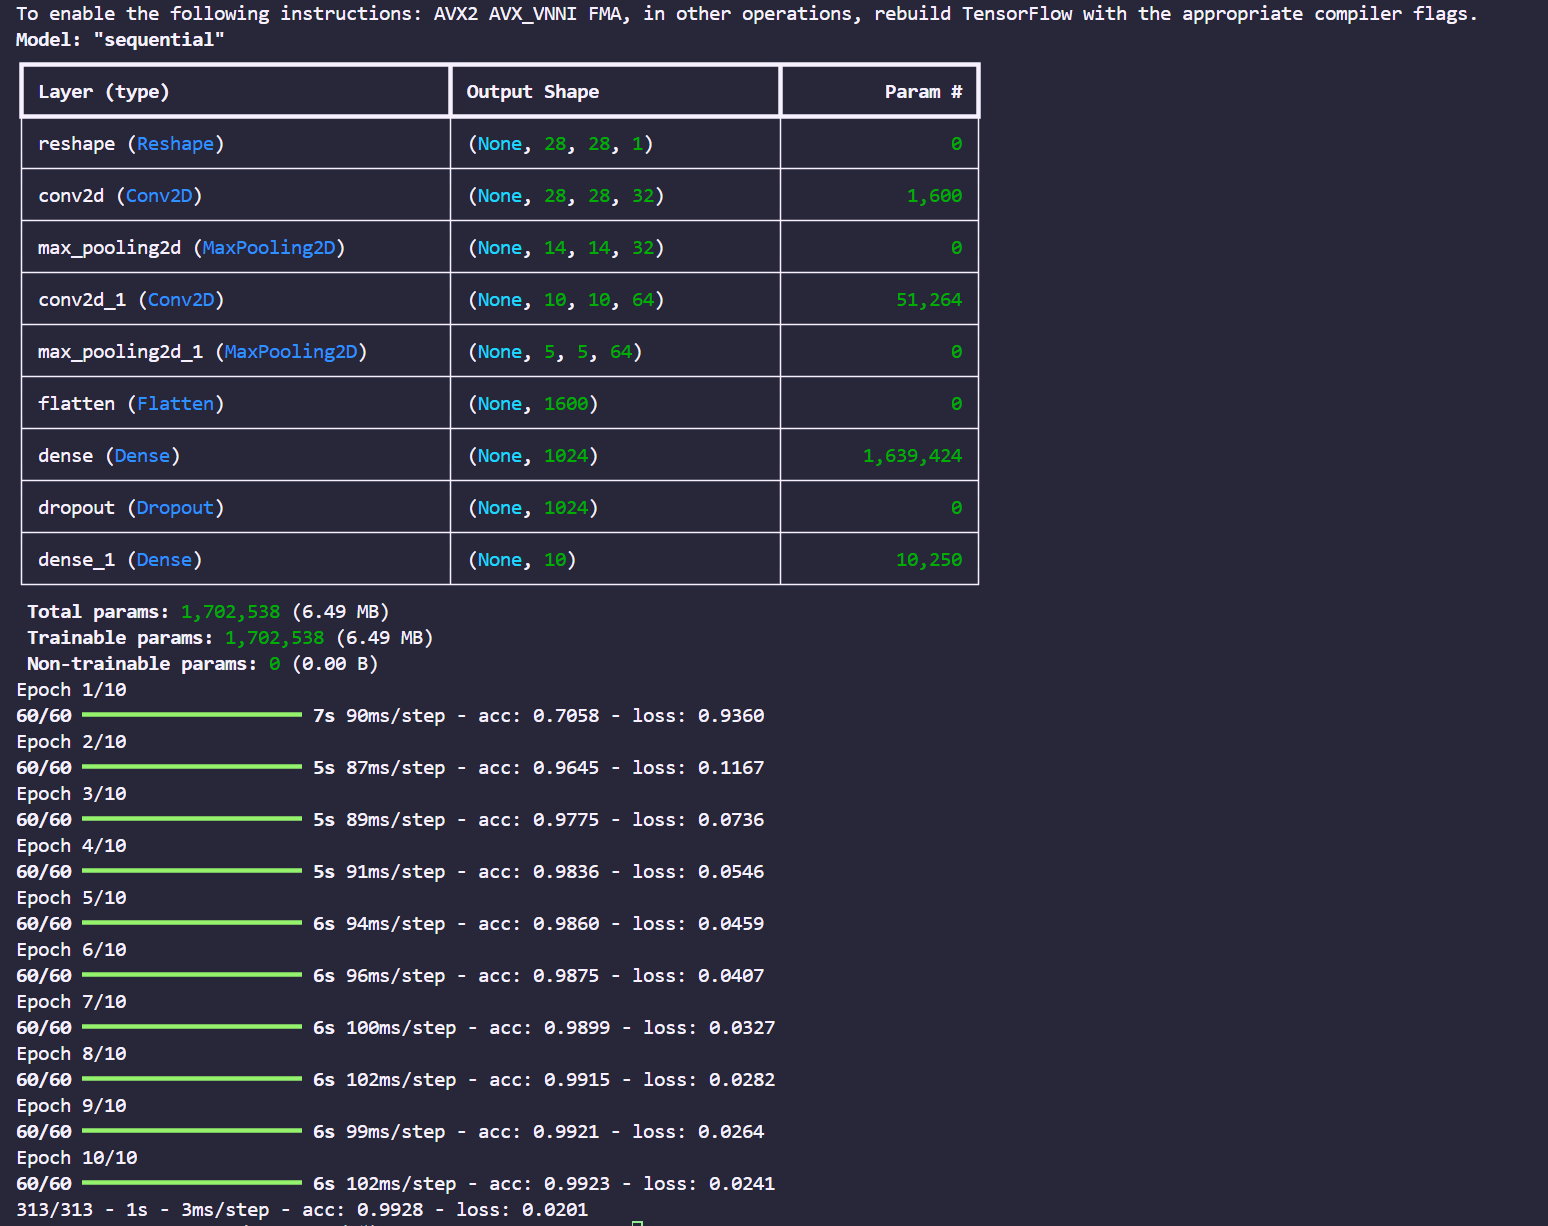